In [1]:
from osgeo import gdal
from gdalconst import *
gdal.UseExceptions()
from pyproj import Proj, transform
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

In [2]:
# Definição dos limites da imagem
xi,yi = 357345.0 - 15, 7369848.0 + 15
xf,yf = xi+(90*30), yi-(96*30)
pontos_imagem = [[xi,yi],[xi,yf],[xf,yf],[xf,yi]]

# Criar poligono referente às bordas da imagem
area_imagem = Polygon(pontos_imagem)

In [3]:
# Abrir arquivo .txt contendo as coordenadas do pontos levantados
with open("./lista01-dados.txt", 'r') as date:
    dados_brutos = date.read().split('\n')
    
    # Armazenar valores em uma lista
    dados = []
    for i in dados_brutos:
        dados.append(i.split(', '))
    
    # Converter os valores para o tipo float
    for i in range(len(dados)):
        for j in range(len(dados[0])):
            dados[i][j] = float(dados[i][j])

In [4]:
# Definição dos src (SAD69 e SAD69 - UTM zona 23s, respectivamente)
srs_in = Proj('epsg:4618')
srs_out = Proj('epsg:29193')

dados_utm = dados[:]

# Conversão das coordenadas geográficas para coordenadas projetadas
for i in range(len(dados)):
    dados_utm[i][0],dados_utm[i][1] = transform(srs_in, srs_out, dados[i][1],dados[i][0])
    
# Definição do poligono levantado (coords. projetadas)
area_levantada = Polygon(dados_utm)

## Análise de quais pontos estão contidos na área da imagem

In [5]:
# Definir os pontos
pontos_na_imagem = []
for i in list(area_levantada.exterior.coords):
    if Point(i).within(area_imagem):
        pontos_na_imagem.append(i)

# Imprimí-los em coordenadas geográficas e porjetadas
print('Pontos levantados contidos na área da imagem:')
print("\nCoordenadas projetadas:")
for i in range(len(pontos_na_imagem)):
    print(pontos_na_imagem[i])

pontos_na_imagem_geo = [list(x) for x in pontos_na_imagem]

for i in range(len(pontos_na_imagem_geo)):
    pontos_na_imagem_geo[i][0], pontos_na_imagem_geo[i][1] = transform(srs_out, srs_in, pontos_na_imagem[i][0], pontos_na_imagem[i][1])

print("\nCoordenadas geográficas:")
for i in range(len(pontos_na_imagem_geo)):
    print(pontos_na_imagem_geo[i])

Pontos levantados contidos na área da imagem:

Coordenadas projetadas:
(359643.4766194863, 7367930.111916511)
(358492.9480108856, 7368768.309207498)
(359370.2486215868, 7369411.421485872)
(358297.68040008505, 7369664.531796878)

Coordenadas geográficas:
[-23.793639999999996, -46.37767]
[-23.78597, -46.38888]
[-23.780240000000003, -46.38021]
[-23.77786, -46.39071]


## Plot das áreas da imagem e dos pontos levantados

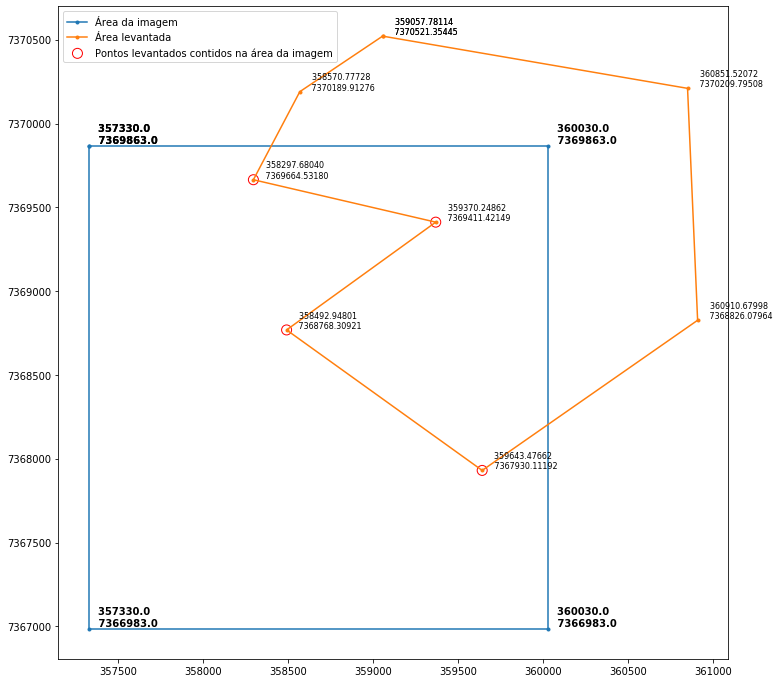

In [6]:
plt.figure(figsize=(12,12))

plt.plot(*area_imagem.exterior.xy, marker='.', label='Área da imagem')
plt.plot(*area_levantada.exterior.xy, marker='.', label='Área levantada')

x_pontos_na_imagem = [pontos_na_imagem[i][0] for i in range(len(pontos_na_imagem))]
y_pontos_na_imagem = [pontos_na_imagem[i][1] for i in range(len(pontos_na_imagem))]

plt.scatter(x_pontos_na_imagem,y_pontos_na_imagem, marker='o', s=100, facecolors='none', edgecolors='r', label="Pontos levantados contidos na área da imagem")

for i in list(area_levantada.exterior.coords):
    plt.text(i[0]+250,i[1]+10,'{:.5f} \n {:.5f}'.format(i[0],i[1]), fontsize=8, ha="center")

for i in list(area_imagem.exterior.coords):
    plt.text(i[0]+220,i[1]+20,'{} \n {}'.format(i[0],i[1]), fontsize=10, fontweight='bold', ha="center")
    
plt.legend(loc='upper left');

## Cálculo da área dos pontos levantados

A área dos pontos levantados foi calculada de duas formas, sendo elas:
- utillização da própria função area da biblioteca shapely;
- definição da função área através da equação sugerida no exercício.

In [7]:
# Função buit-in da biblioteca shapely
area_levantada.area

4432199.870722242

In [8]:
# Definição da função sugerida no exercício
def area_polygon(x):

    tam_i = len(x)

    soma_numerador = 0
    for i in range(tam_i-1):
        soma_numerador += (x[i][0]*x[i+1][1] - x[i][1]*x[i+1][0])

    return abs(soma_numerador/2)

In [9]:
# Chamada da função para a área levantada
area_polygon(list(area_levantada.exterior.coords))

4432199.870605469